# Introduction to Neural Network Regression with TensorFlow

We're going to simplify regression problem : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

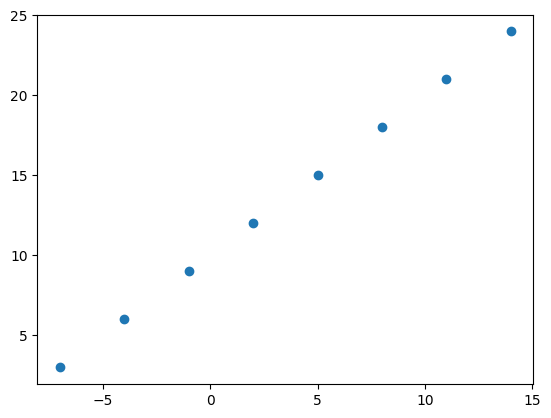

In [ ]:
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualise data
plt.scatter(X,y)

In [ ]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [ ]:
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

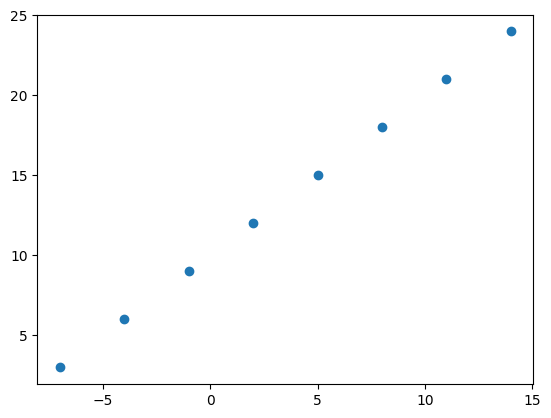

In [ ]:
plt.scatter(X,y)

## steps in modelling with tensorflow

1. Create a model
2. Compile the model - define the loss function, the optimizer and evaluation metrics
3. Fitting the model

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 9.4129 - mae: 9.4129
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 9.2804 - mae: 9.2804
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 9.1479 - mae: 9.1479
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 9.0154 - mae: 9.0154
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 8.8829 - mae: 8.8829


## Improve our Model

We can improve our model by altering the steps we took to create a model

1. **Creating the model**: here we might add more layers, increase the number of increase the number of hdiden units (`neurons`), change the `activation function` of each layer
2. **Compilig the model**: change the `optimisation function`, or perhaps `leraning rate`.
3. **Fitting the model**: here we might fit a model for more **epochs** or on more data

In [ ]:
# REBUILD the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=30)


Epoch 1/30
1/1 [==============================] - 1s 790ms/step - loss: 13.3766 - mae: 13.3766
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 7.9042 - mae: 7.9042
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 8.6076 - mae: 8.6076
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 6.7371 - mae: 6.7371
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 6.3200 - mae: 6.3200
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 5.7496 - mae: 5.7496
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 2.8974 - mae: 2.8974
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 3.5938 - mae: 3.5938
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 2.4202 - mae: 2.4202
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 1.6189 - mae: 1.6189
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - loss: 2.1860 - 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 75ms/step


array([[27.703777]], dtype=float32)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 29ms/step


array([[27.703777]], dtype=float32)

In [ ]:
model.predict([14.0])

1/1 [==============================] - 0s 29ms/step


array([[24.684086]], dtype=float32)

## Evaluating the Model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it-> evaluate it-> tweak a model -> evaluate it -> ...
```
Important note to remember when it comes to evaluation is to  **visualise**.

Its good idea to visualise :
* The data
* The model itself
* The training of a model
* The precdictions of a model

In [ ]:
X = tf.range(-100,100,4)
y = X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

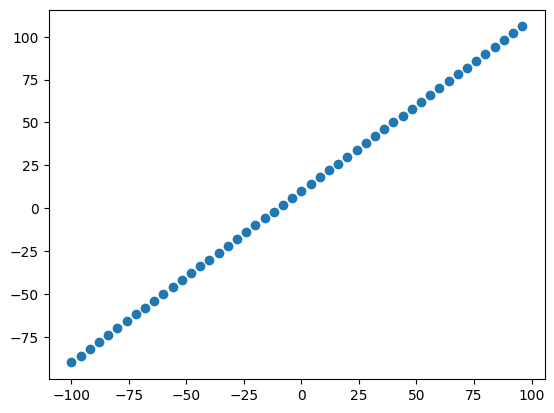

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

## The 3 sets...

* **Training Set**-the model learns from this data, typically (70-80%) of the available data.
* **Validation Set**-the model gets tuned on this data, typically (10-15%) of the available data.
* **Test Set**-the model gets evaluated on this data to test what is learned, this is typically (10-15%) of the available data.

In [ ]:
XT = X[:40]
yT = y[:40]

Xt = X[40:]
yt = y[40:]

## Visualizing the data

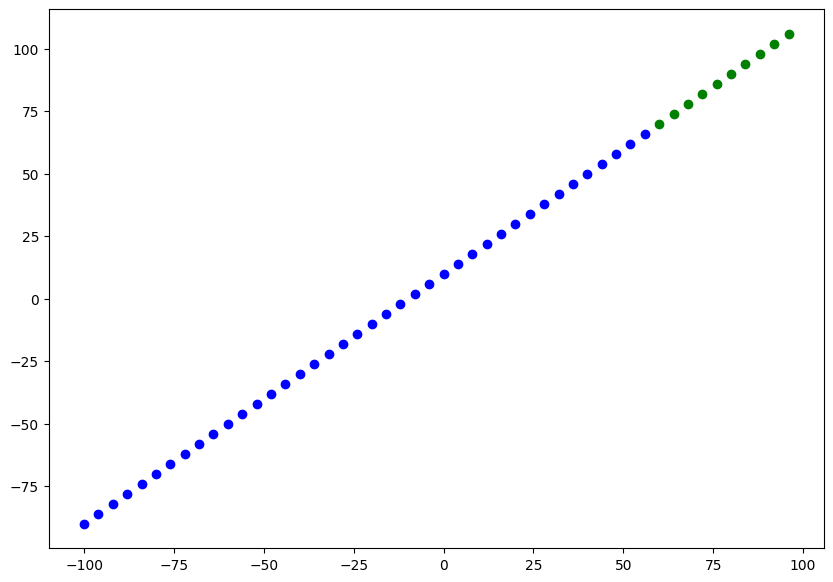

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(XT,yT,c='b')
plt.scatter(Xt,yt,c='g')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 X and 1 y predict 1 output value
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(XT,axis=-1),yT,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 88.1853 - mae: 88.1853
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 52.7298 - mae: 52.7298
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 17.0773 - mae: 17.0773
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2852 - mae: 9.2852
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9291 - mae: 10.9291
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1041 - mae: 10.1041
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1372 - mae: 9.1372
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1250 - mae: 9.1250
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 15.0925 - mae: 15.0925
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.6052 - mae: 7.6052
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Lets create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. create a model as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
],name='model_1')

# 2. compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- **Total Params**- total no of parameters in the model
- **Trainable Params**-these parameters of the model can be updated while training
- **Non-trainable Params**-these parameters aren't updated while training


In [ ]:
# layer type - Dense -> fully connected network
# it means all neurons of the layer are connected all neurons after the layer

In [ ]:
model.fit(XT,yT,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 46.8386 - mae: 46.8386
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 34.2062 - mae: 34.2062
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 36.8730 - mae: 36.8730
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 18.6857 - mae: 18.6857
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 24.1660 - mae: 24.1660
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6523 - mae: 11.6523
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8019 - mae: 12.8019
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2085 - mae: 11.2085
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.0363 - mae: 41.0363
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 28.3593 - mae: 28.3593
Epoch 11/100
2/2 [==============================] - 0s 7ms

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


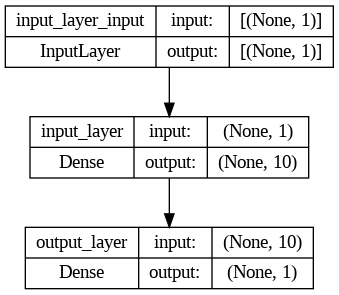

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

It's good idea to plot against them against the ground truth values

In [ ]:
y_pred = model.predict(Xt)
np.array(y_pred), np.array(yt)

1/1 [==============================] - 0s 44ms/step


(array([[ 78.42545 ],
        [ 83.53326 ],
        [ 88.64106 ],
        [ 93.74885 ],
        [ 98.85665 ],
        [103.964455],
        [109.07225 ],
        [114.180046],
        [119.28784 ],
        [124.39564 ]], dtype=float32),
 array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32))

In [ ]:
def plot_predictions(train_data=XT,train_labels=yT,
                     test_data=Xt,test_labels=yt,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',label='Training Data')
  plt.scatter(test_data,test_labels,c='g',label='Testing Data')
  plt.scatter(test_data,predictions,c='r',label='predictions')
  plt.legend();

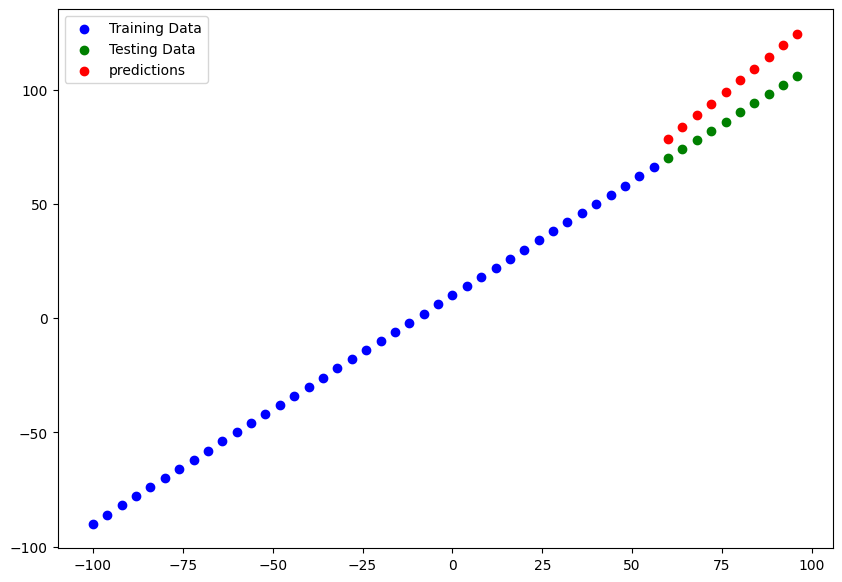

In [ ]:
plot_predictions()

## Evaluating our model predictions with regression evaluation metrics

Since we are working on regression, two of the main metrics are :
* `MAE` - mean absolute error - great starter metric for any regression problem
* `MSE` - mean squared error - when larger erros are more significant than small errors
* `Huber` - combination of MSE & MAE, less sensitive to outliers than MSE

In [ ]:
model.evaluate(Xt,yt)

1/1 [==============================] - 0s 115ms/step - loss: 13.4106 - mae: 13.4106


[13.410550117492676, 13.410550117492676]

In [ ]:
tf.metrics.mean_absolute_error(yt,tf.squeeze(tf.constant(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=13.41055>

In [ ]:
tf.metrics.mean_squared_error(y_true=yt,y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=189.96738>

In [ ]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(tf.constant(y_pred)))

def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(tf.constant(y_pred)))

## Running experiments to improve our model

1. Lets do `model_1`-same as the model,  1 layer, trained for 100 epochs
2. Lets do `model_2`-2 layers, train for 100 epochs
3. Lets do `model_3`-2 layers, train for 500 epochs

**Build `Model_1`,`Model_2` & `Model_3`**:

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])
model_1.fit(tf.expand_dims(XT,axis=-1),yT,epochs=100)

# ----------------------------------------------

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mse'])
model_2.fit(tf.expand_dims(XT,axis=-1),yT,epochs=100)

# ----------------------------------------------

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
model_3.fit(tf.expand_dims(XT,axis=-1),yT,epochs=500)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 16.1008 - mae: 16.1008
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 12.8495 - mae: 12.8495
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4725 - mae: 11.4725
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4499 - mae: 9.4499
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3424 - mae: 10.3424
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5833 - mae: 9.5833
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.6977 - mae: 8.6977
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0508 - mae: 9.0508
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 19.0785 - mae: 19.0785
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2930 - mae: 10.2930
Epoch 11/100
2/2 [==============================] - 0s 10ms/s

In [ ]:
# make and plot predicitons for model_1
y_pred1 = model_1.predict(Xt)
# plot_predictions(predictions=y_pred1)

# calculate model_1 evaluation metrics
mae_1 = mae(yt,y_pred1)
mse_1 = mse(yt,y_pred1)
mae_1,mse_1
print()


# make and plot prections for model_2
y_pred2 = model_2.predict(Xt)
# plot_predictions(predictions=y_pred1),plot_predictions(predictions=y_pred2)

# calculate the model_2 evaluation metrics
mae_2 = mae(yt,y_pred2)
mse_2 = mse(yt,y_pred2)
mae_2,mse_2
print()


# calculate the model_3 evaluation metrics
y_pred3 = model_3.predict(Xt)
mae_3 = mae(yt,y_pred3)
mse_3 = mse(yt,y_pred3)
mae_3,mse_3
print()




1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 18ms/step



1/1 [==============================] - 0s 53ms/step



(None, None, None)

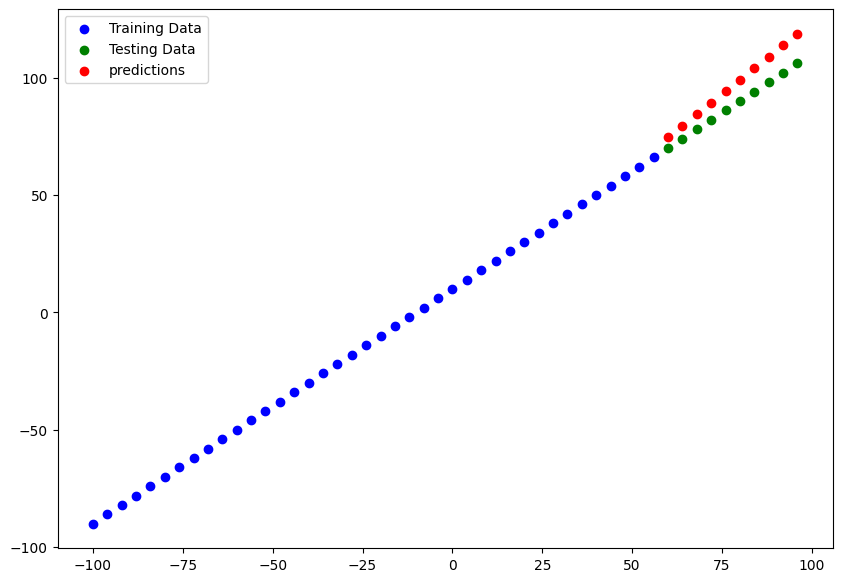

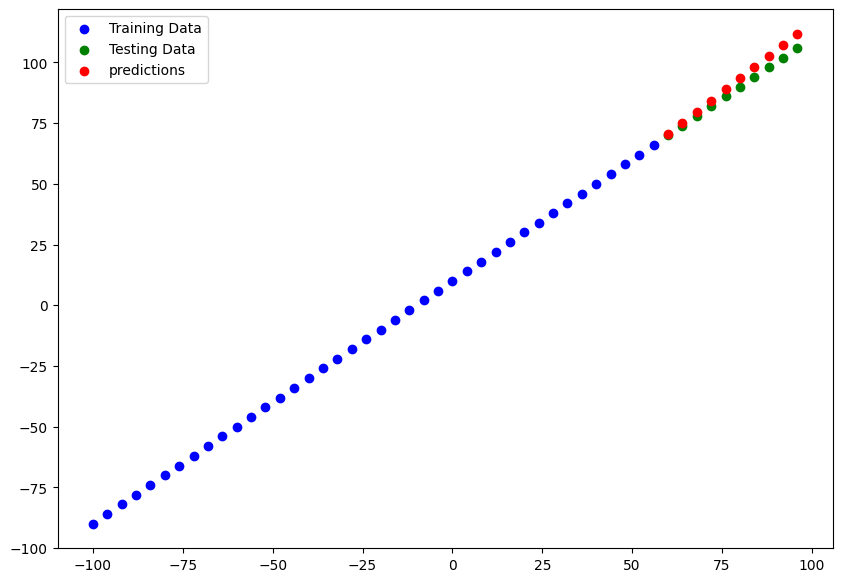

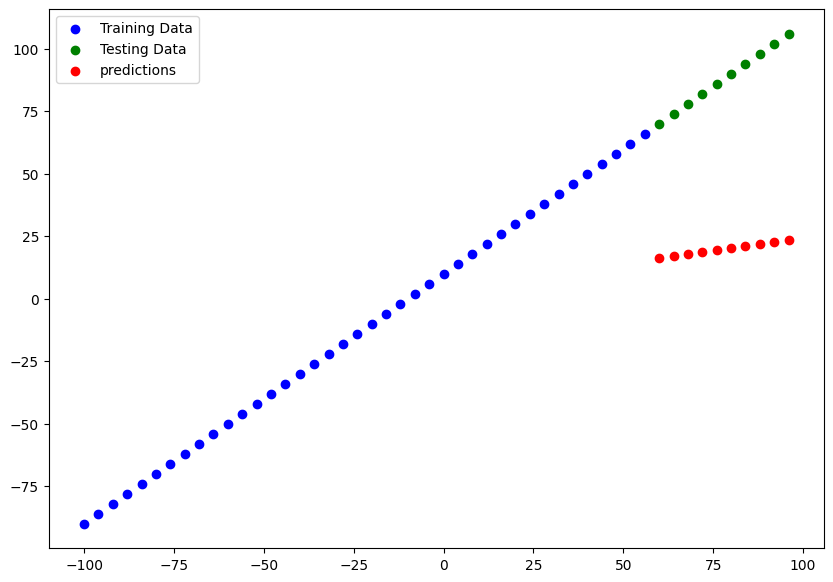

In [ ]:
plot_predictions(predictions=y_pred1),plot_predictions(predictions=y_pred2),plot_predictions(predictions=y_pred3)

## Comparing the resulting of our experiments

In [ ]:
import pandas as pd

model_results = [
    ['model_1',mae_1.numpy(),mse_1.numpy()],
    ['model_2',mae_2.numpy(),mse_2.numpy()],
    ['model_3',mae_3.numpy( ),mse_3.numpy()]
                 ]

all_results = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,8.639921,81.161850
1,model_2,3.174712,12.926285
2,model_3,68.089394,4721.153809


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking our experiments:
* `TensorBoard`-a component of TensorFlow library to help track modelling experiments
* `Weights and Biases`-a tool for tracking all kinds of machine learning experiments

## Saving our models

Saving our models allow us to use them outside of Google Colab / in a web application / mobile app.

There are 2 main formats we can save our model :
1. The SavedModel format
2. The HDF5 format


In [ ]:

model_2.save("best_model_SavedModel_format")


In [ ]:

model_2.save("best_model_HDF5_format.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a Saved model

In [ ]:
loaded_savedModel_format = tf.keras.models.load_model(filepath="/content/best_model_SavedModel_format")

In [ ]:
model_2.summary()==loaded_savedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                              

True

In [ ]:
# compare model_2 predictions with savedModel format model predictions
model_2_preds = model_2.predict(Xt)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(Xt)
model_2_preds == loaded_savedModel_format_preds

1/1 [==============================] - 0s 17ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_h5_model = tf.keras.models.load_model(filepath="/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loaded_h5_model_preds = loaded_h5_model.predict(Xt)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [ ]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read in insurance dataset
insurance_dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# lets try to one hot encode the categorial features
insurance_one_hot=pd.get_dummies(insurance_dataset)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# create X,y values (data and labels)
X = insurance_one_hot.drop(['charges'],axis=1)
y = insurance_one_hot['charges']

In [ ]:
# create training and test datasets
from sklearn.model_selection import train_test_split
XT,Xt,yT,yt = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# build a neural network (sort of like model_2 above)
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])
insurance_model.fit(XT,yT,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8656.6104 - mae: 8656.6104
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7878.1338 - mae: 7878.1338
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7601.2861 - mae: 7601.2861
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7661.3066 - mae: 7661.3066
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7643.9341 - mae: 7643.9341
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7603.3813 - mae: 7603.3813
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7559.7822 - mae: 7559.7822
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7759.9653 - mae: 7759.9653
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7620.1064 - mae: 7620.1064
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7706.7505 - mae: 7706.7505

In [ ]:
insurance_model.evaluate(Xt,yt)

9/9 [==============================] - 0s 3ms/step - loss: 7099.5640 - mae: 7099.5640


[7099.56396484375, 7099.56396484375]

In [ ]:
yT.median(),yT.mean()

(9575.4421, 13346.089736364485)

## Improving the larger example model
1. Try adding extra layer with more hidden units
2. Train for longer

In [ ]:
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
insurance_model_2.fit(XT,yT,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13268.6758 - mae: 13268.6758
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13073.2061 - mae: 13073.2061
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12688.9404 - mae: 12688.9404
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 11962.1826 - mae: 11962.1826
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10783.8896 - mae: 10783.8896
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9336.1895 - mae: 9336.1895
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8062.2485 - mae: 8062.2485
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7510.5000 - mae: 7510.5000
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7426.1782 - mae: 7426.1782
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7406.3052 - mae:

In [ ]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
history=insurance_model_3.fit(XT,yT,epochs=200,verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13296.7295 - mae: 13296.7295
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13158.0596 - mae: 13158.0596
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12850.2539 - mae: 12850.2539
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12228.7607 - mae: 12228.7607
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11155.9062 - mae: 11155.9062
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9718.7217 - mae: 9718.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8329.1553 - mae: 8329.1553
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7578.9512 - mae: 7578.9512
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7431.2402 - mae: 7431.2402
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7409.2998 - mae:

In [ ]:
insurance_model_2.evaluate(Xt,yt)

9/9 [==============================] - 0s 3ms/step - loss: 4796.8701 - mae: 4796.8701


[4796.8701171875, 4796.8701171875]

In [ ]:
insurance_model_3.evaluate(Xt,yt)

9/9 [==============================] - 0s 3ms/step - loss: 3505.9548 - mae: 3505.9548


[3505.954833984375, 3505.954833984375]

Text(0, 0.5, 'epochs')

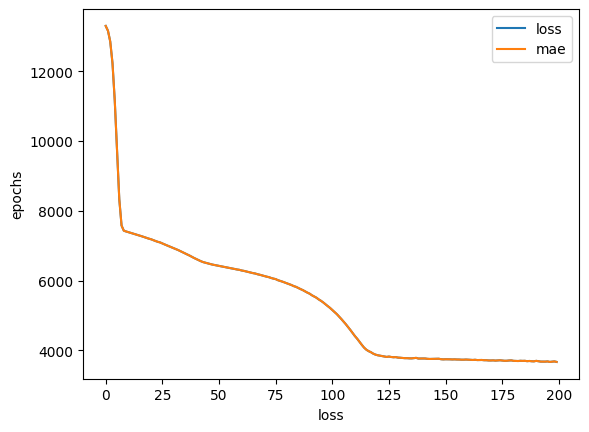

In [ ]:
# plot history  (also known as loss curve or a tarining curve)
pd.DataFrame(history.history).plot()
plt.xlabel('loss')
plt.ylabel('epochs')

## Prepocessing Data ( Normalizationa and standardization)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## To prepare our data, we can borrow few classes from scikit learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']), # turn all these columns in range (0,1)
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

# create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# build our train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has bee now noramalized and one hot encoded

Now it's ready to build a neural network

In [ ]:
# nnr on normalized data

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)
insurance_model_4.fit(X_train_normal,yT,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 9429.3926 - mae: 9429.3926
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 4689.2622 - mae: 4689.2622
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 3713.2415 - mae: 3713.2415
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3663.1169 - mae: 3663.1169
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 3589.3857 - mae: 3589.3857
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3692.4539 - mae: 3692.4539
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 3709.3230 - mae: 3709.3230
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3606.0625 - mae: 3606.0625
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3629.4099 - mae: 3629.4099
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3772.1880 - mae: 3772.1880

In [ ]:
insurance_model_4.evaluate(X_test_normal,yt) # adam(lr=0.001)

9/9 [==============================] - 0s 2ms/step - loss: 3439.2014 - mae: 3439.2014


[3439.201416015625, 3439.201416015625]

In [ ]:
insurance_model_4.evaluate(X_test_normal,yt) # adam(lr=0.01)

9/9 [==============================] - 0s 2ms/step - loss: 3172.7549 - mae: 3172.7549


[3172.7548828125, 3172.7548828125]

In [ ]:
insurance_model_4.evaluate(X_test_normal,yt) # adam(lr=0.1)

9/9 [==============================] - 0s 2ms/step - loss: 3209.2771 - mae: 3209.2771


[3209.277099609375, 3209.277099609375]

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

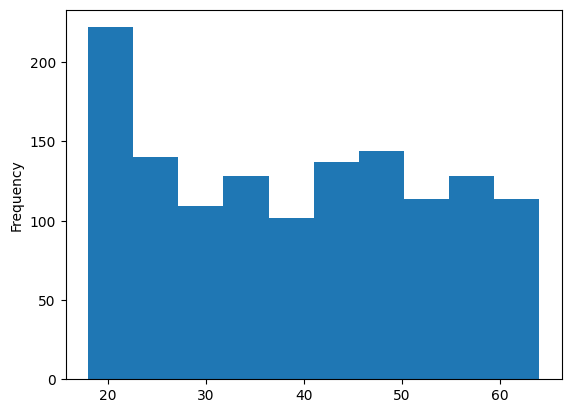

In [ ]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

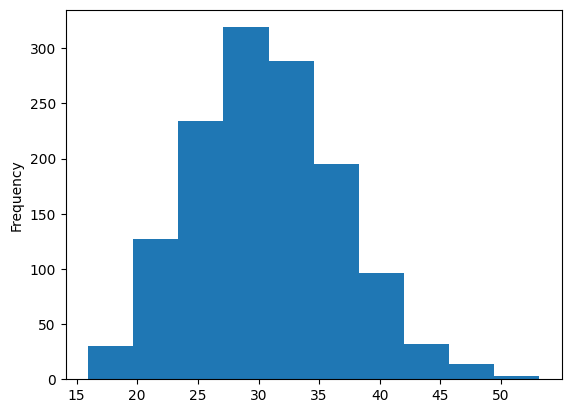

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64